Import The Required Libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

Data gathiring

In [88]:
data=pd.read_csv('heart_attack_prediction_dataset.csv')

Look at the top 5 records of data

In [89]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [90]:
data.shape

(8763, 26)

In [91]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [92]:
#to check the numeric columns
data.select_dtypes('number')

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7,0
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9,0
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4,1
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8,0


In [93]:
#to check the categorical columns
data.select_dtypes("object") 

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
0,BMW7812,Male,158/88,Average,Argentina,South America,Southern Hemisphere
1,CZE1114,Male,165/93,Unhealthy,Canada,North America,Northern Hemisphere
2,BNI9906,Female,174/99,Healthy,France,Europe,Northern Hemisphere
3,JLN3497,Male,163/100,Average,Canada,North America,Northern Hemisphere
4,GFO8847,Male,91/88,Unhealthy,Thailand,Asia,Northern Hemisphere
...,...,...,...,...,...,...,...
8758,MSV9918,Male,94/76,Healthy,Thailand,Asia,Northern Hemisphere
8759,QSV6764,Female,157/102,Healthy,Canada,North America,Northern Hemisphere
8760,XKA5925,Male,161/75,Average,Brazil,South America,Southern Hemisphere
8761,EPE6801,Male,119/67,Unhealthy,Brazil,South America,Southern Hemisphere


In [94]:
# to counts columns and data type of all the data
data.info

<bound method DataFrame.info of      Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1       

In [95]:
# Check the descriptive statistics of numeric variables
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


Data preproresing

1.copy the base data for manupulation and procrssing

In [96]:
df=data.copy()
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


2.check missing value

In [97]:
data.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [98]:
data['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [99]:
data['Heart Attack Risk'].unique()

array([0, 1], dtype=int64)

3.checking duplicates columns and rows

In [100]:
data.duplicated().sum()

0

In [101]:
data.drop_duplicates()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


4.Remove columns not required for processing

In [102]:
data.drop(['Patient ID','Country','Income','Continent'],axis=1,inplace=True)

In [103]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,31.251233,286,0,6,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,27.194973,235,1,7,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,28.176571,587,4,4,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,36.464704,378,3,4,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,21.809144,231,1,5,Northern Hemisphere,0


In [104]:
data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

5.handling inconsistent data type

In [105]:
data['BP_systolic'] = data['Blood Pressure'].apply(lambda x:x.split('/')[0])
data['BP_diastolic'] = data['Blood Pressure'].apply(lambda x:x.split('/')[1])
data.dtypes

Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Hemisphere                          object
Heart Attack Risk                    int64
BP_systolic                         object
BP_diastoli

In [106]:
#data types of systolic and diastolic blood pressure is object. change it to int
data['BP_systolic'] = pd.to_numeric(data['BP_systolic'])
data['BP_diastolic'] = pd.to_numeric(data['BP_diastolic'])
data.dtypes

Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Hemisphere                          object
Heart Attack Risk                    int64
BP_systolic                          int64
BP_diastoli

In [107]:
#drop out blood pressure columns after split 
data.drop('Blood Pressure',axis=1,inplace=True)

In [108]:
data.head(2)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk,BP_systolic,BP_diastolic
0,67,Male,208,72,0,0,1,0,0,4.168189,...,9,6.615001,31.251233,286,0,6,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,1,4.963459,27.194973,235,1,7,Northern Hemisphere,0,165,93


EDA(Exploratorty data analysis)

to check the data are balancedor imbalanced

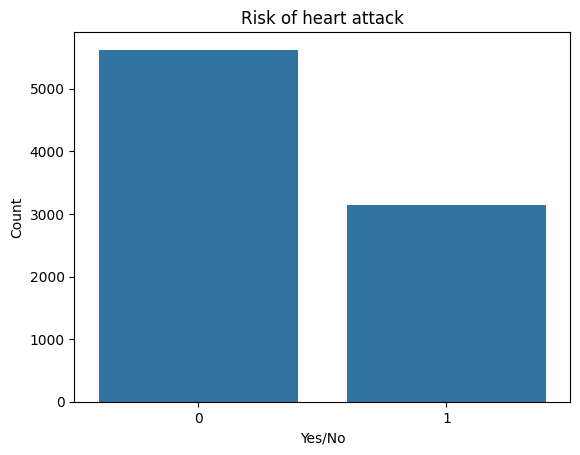

In [109]:
sns.countplot(data=data,x='Heart Attack Risk')
plt.title('Risk of heart attack')
plt.xlabel('Yes/No')
plt.ylabel('Count')
plt.show()

In [110]:
data['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [111]:
100*data['Heart Attack Risk'].value_counts()/len(data['Heart Attack Risk'])

Heart Attack Risk
0    64.178934
1    35.821066
Name: count, dtype: float64

* Data is highly imbalanced, ratio = 64:36<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

1.Plot distibution of individual predictors by Heart Attack Risk

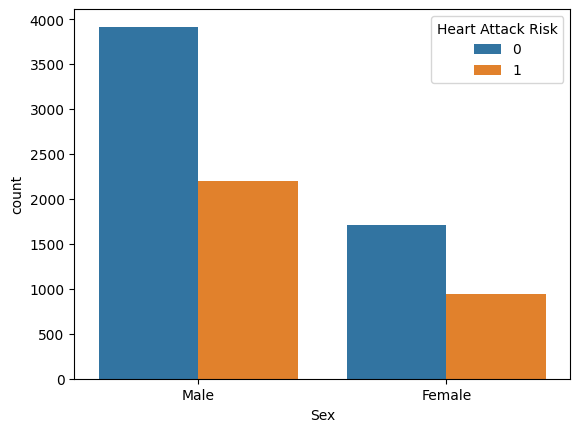

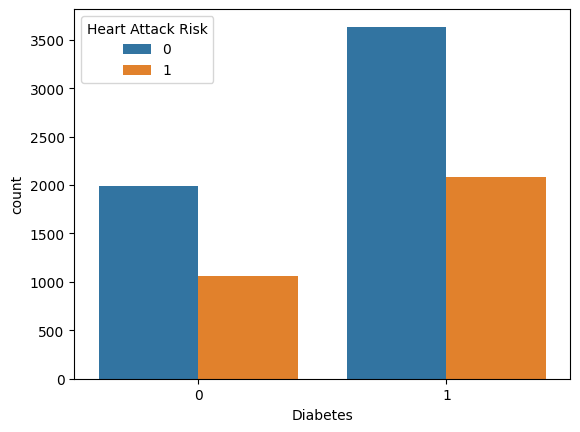

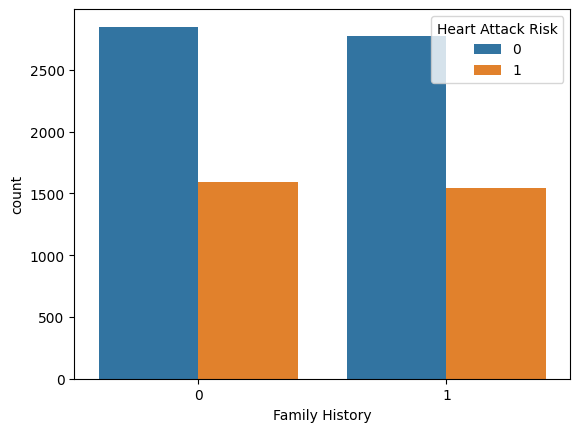

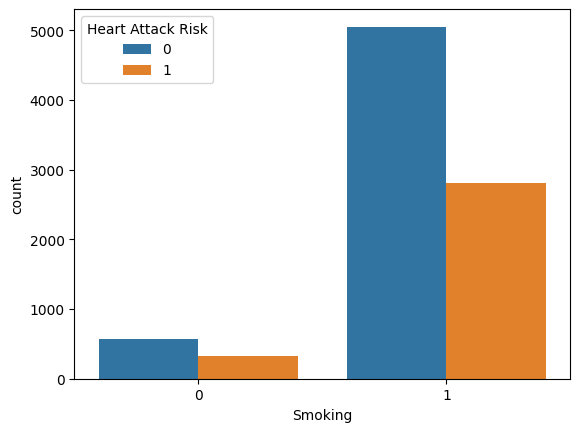

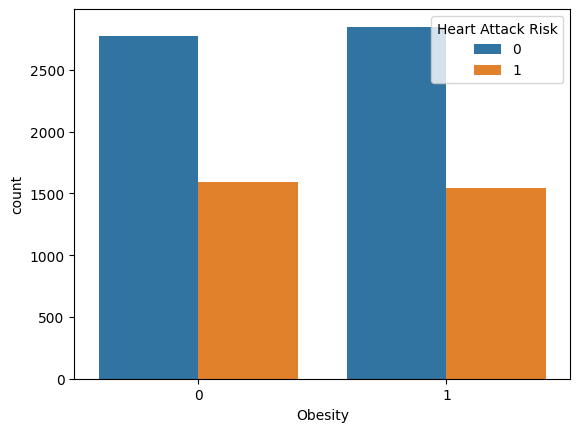

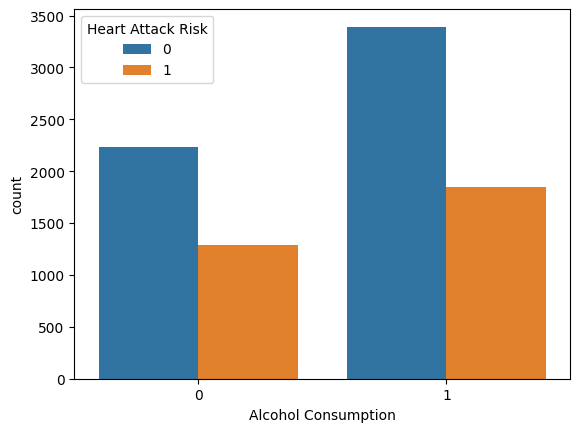

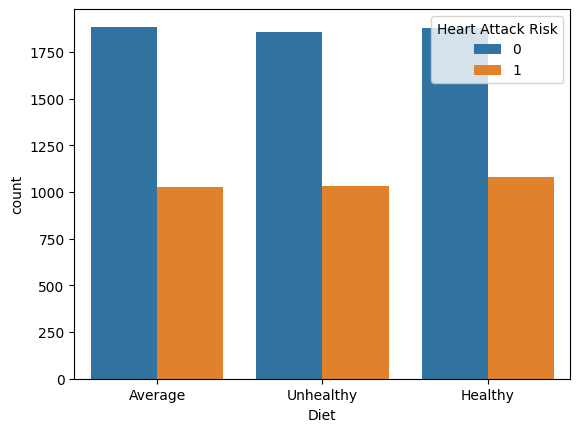

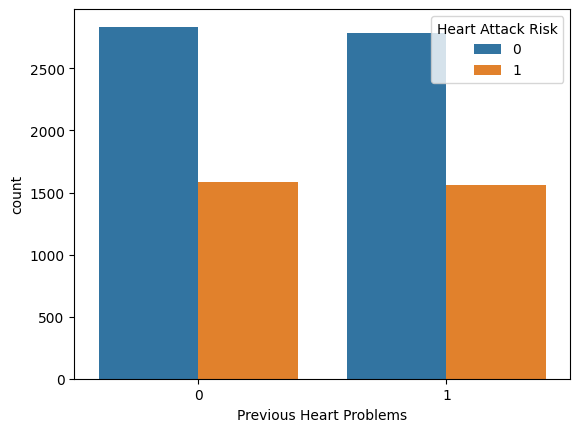

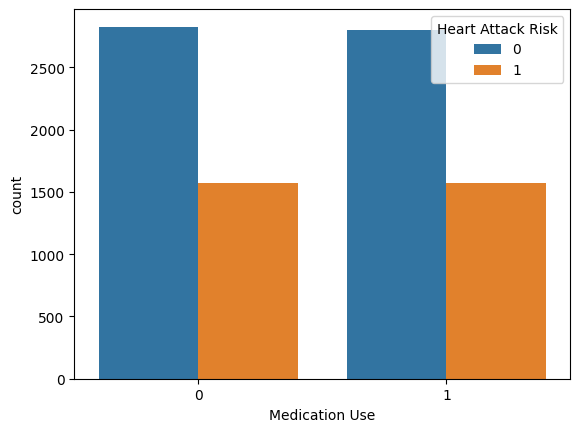

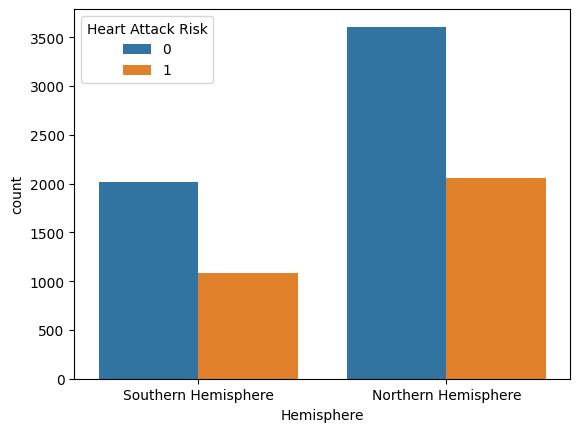

In [112]:
for i ,element in enumerate(data.drop(['Age','Cholesterol','Heart Rate','Exercise Hours Per Week','Stress Level','Sedentary Hours Per Day','BMI','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day','Heart Attack Risk','BP_systolic','BP_diastolic'],axis=1)):
    plt.figure(i)
    sns.countplot(data=data,x=element,hue='Heart Attack Risk')

'Distribution of Patient Ages' 

<Figure size 1000x1000 with 0 Axes>

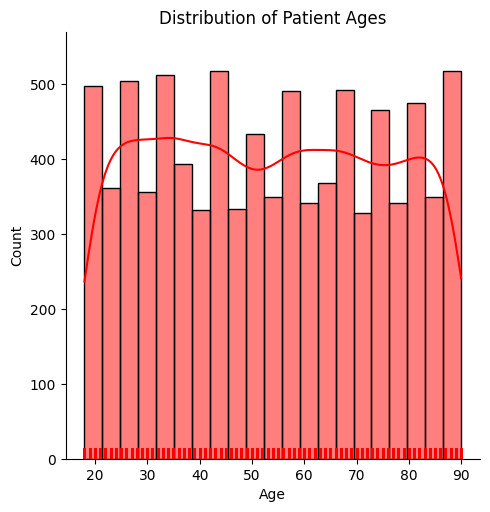

In [113]:
#'Distribution of Patient Ages'  
plt.figure(figsize=(10, 10))
sns.displot(data = data,x = "Age",kde = True,rug = True,color = "Red")
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [114]:
print("Finding the features which are most relevant to Heart Attack Risk")
numeric_vals = data.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr.sort_values(['Heart Attack Risk'], inplace=True, ascending=False)
numeric_corr

Finding the features which are most relevant to Heart Attack Risk


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_systolic,BP_diastolic
Heart Attack Risk,0.006403,0.019340,-0.004251,0.017225,-0.001652,-0.004051,-0.013318,-0.013778,0.011133,0.000274,0.002234,-0.004111,-0.005613,0.000020,0.010471,-0.005014,-0.018528,1.000000,0.018585,-0.007509
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.017292,-0.005454,0.016056,0.004456,0.019340,0.000133,0.002083
BP_systolic,0.003070,0.000133,0.008482,-0.005306,-0.009762,-0.009534,-0.001918,0.010764,-0.009506,-0.011926,-0.001182,0.017848,0.003393,0.004279,0.005121,-0.007574,-0.004628,0.018585,1.000000,0.013337
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.002852,0.010431,-0.002411,-0.012457,0.017225,-0.005306,-0.000512
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,0.003777,0.001717,0.007725,-0.001245,0.011133,-0.009506,-0.003469
Triglycerides,0.003415,-0.005454,0.012244,0.010431,-0.001904,0.004650,0.001467,0.006169,0.001717,-0.019029,-0.011095,-0.003921,-0.005785,-0.005964,1.000000,-0.007556,-0.029216,0.010471,0.005121,0.000545
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.002612,0.003415,0.001384,-0.002185,0.006403,0.003070,-0.009826
Medication Use,0.000980,-0.000905,0.009244,-0.002656,0.000981,-0.010877,-0.006267,0.003339,-0.007119,0.005336,1.000000,0.000863,0.022513,0.009514,-0.011095,-0.011139,-0.020393,0.002234,-0.001182,0.004607
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,0.015718,-0.019029,0.008537,0.004460,0.000274,-0.011926,0.008813
BMI,-0.002612,0.017292,0.005299,-0.002852,-0.011492,0.007670,-0.006058,0.010562,0.003777,0.015718,0.009514,-0.003250,-0.000024,1.000000,-0.005964,0.008110,-0.010030,0.000020,0.004279,0.000806


To check the correlation between two more more independent varible

In [115]:
numeric_corr=data.select_dtypes('number').corr()

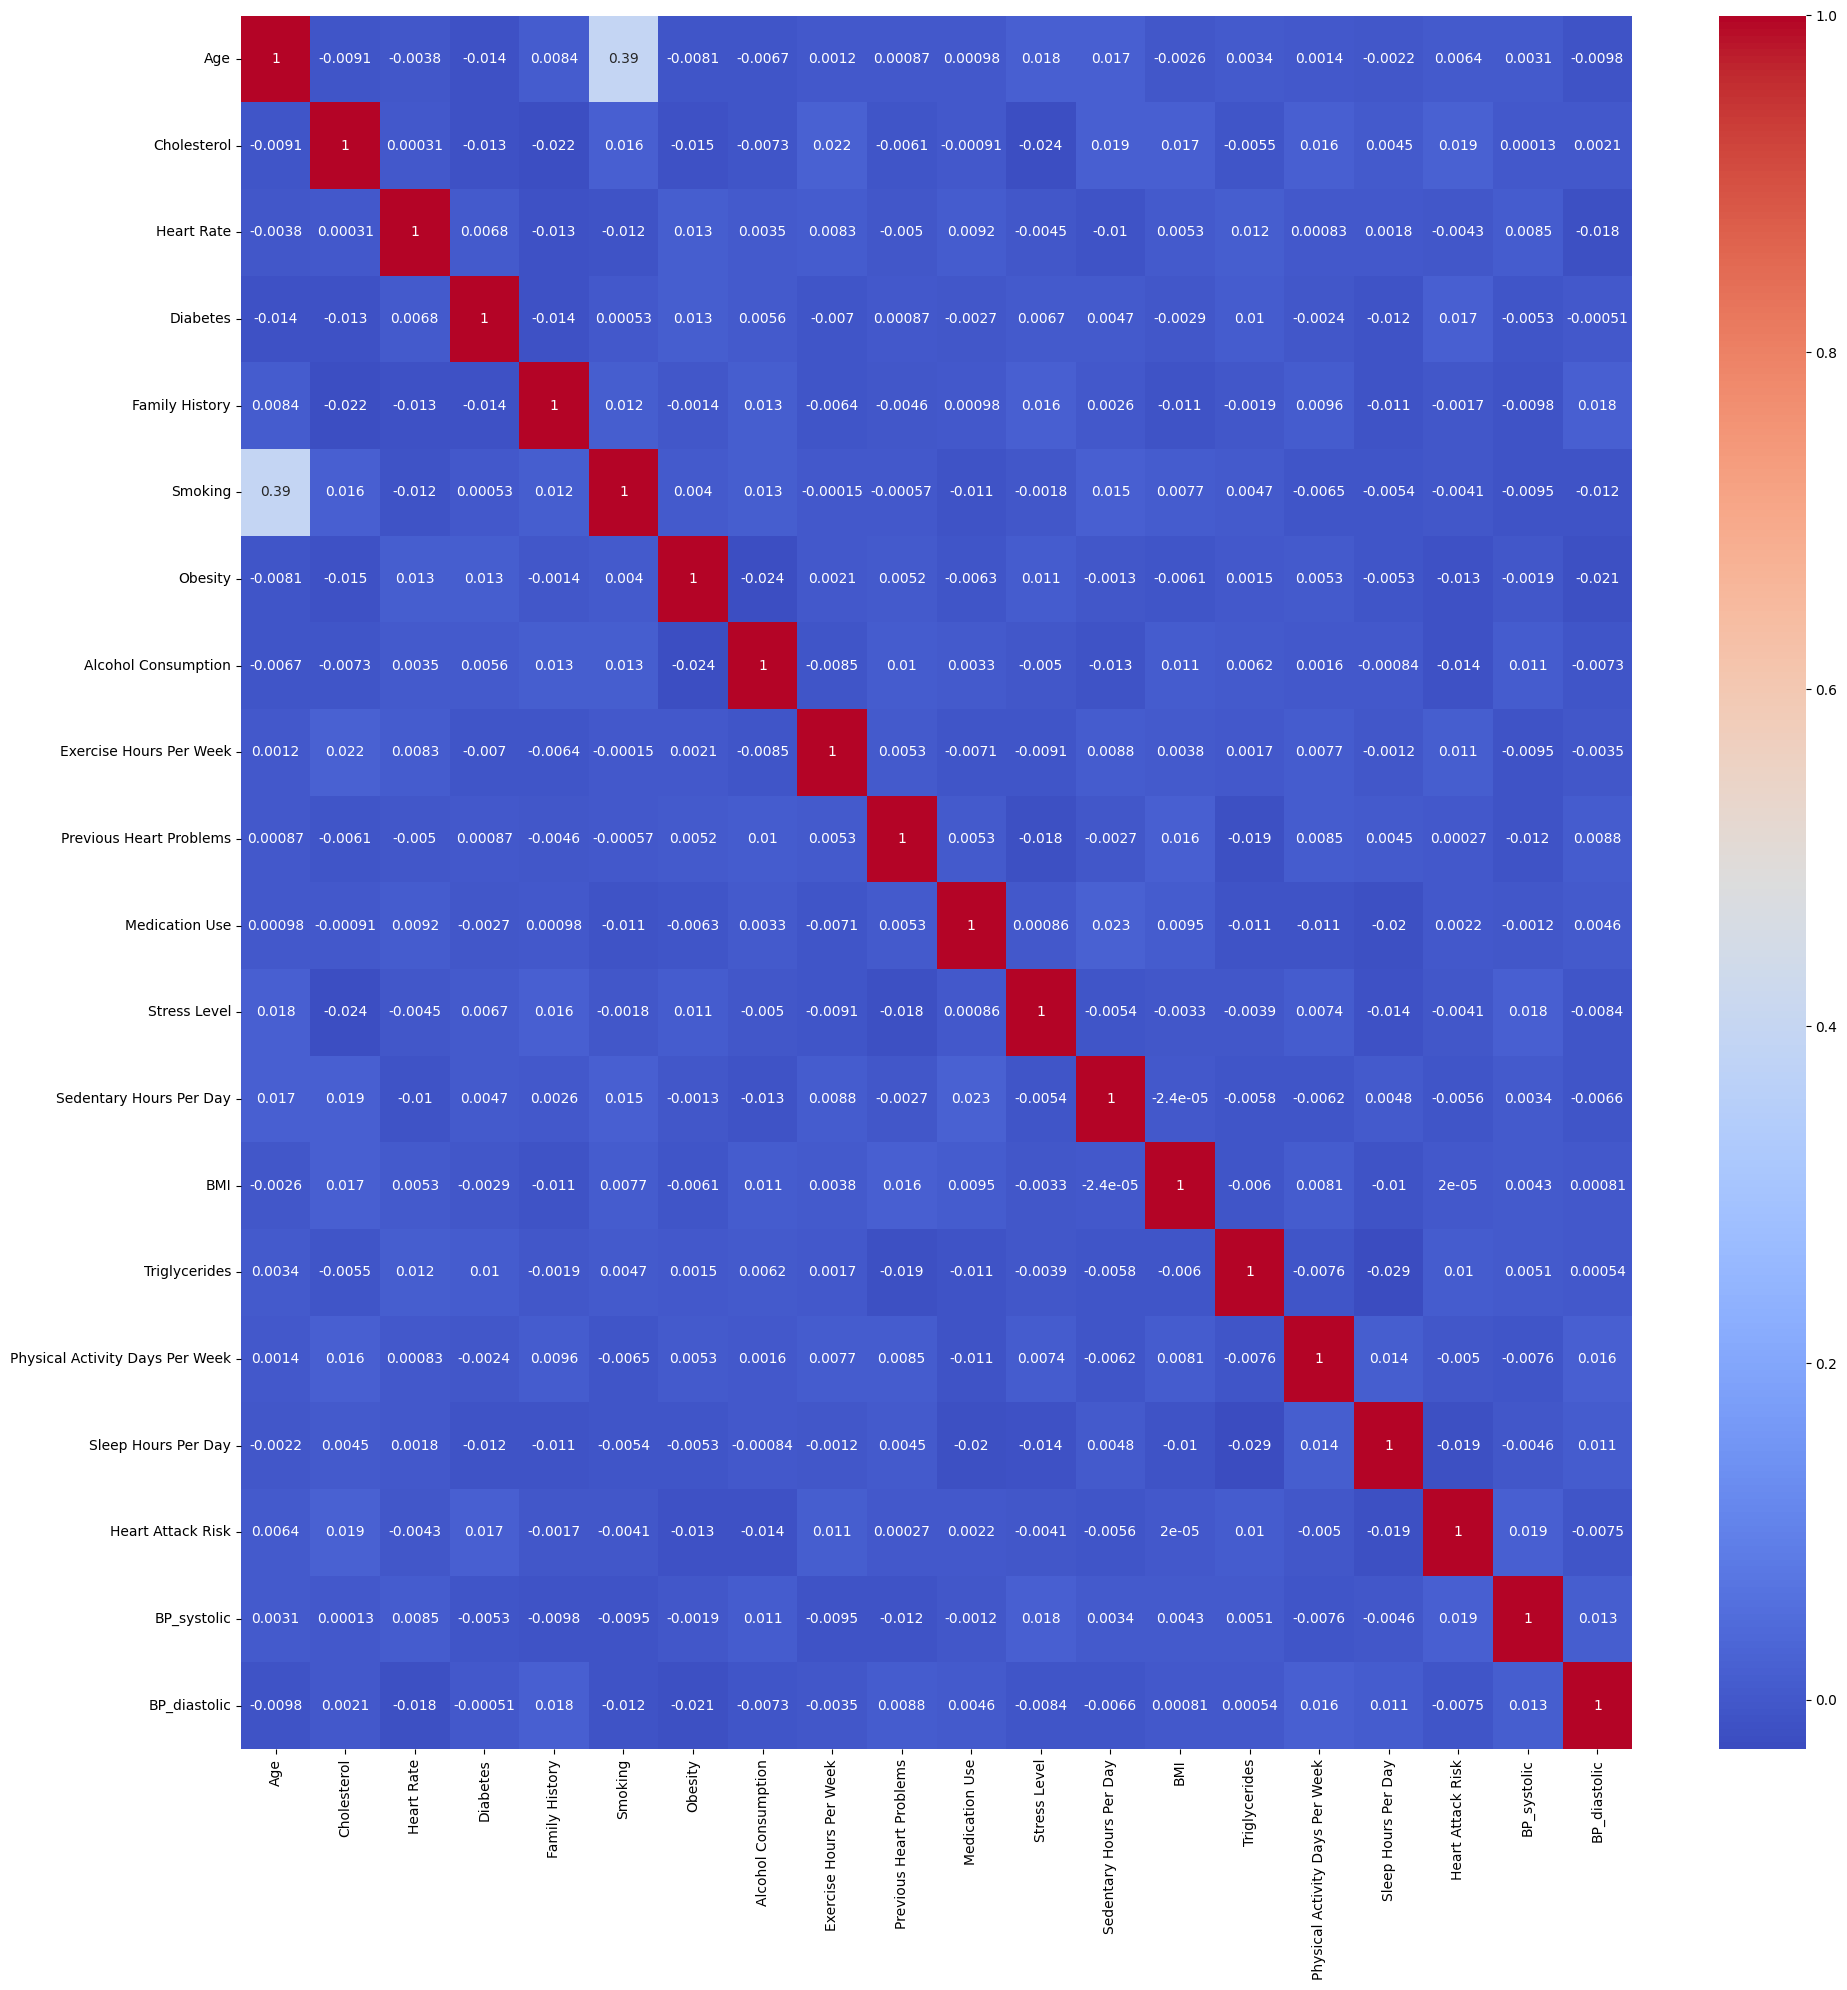

In [144]:
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()


Linechart by age and heart rate

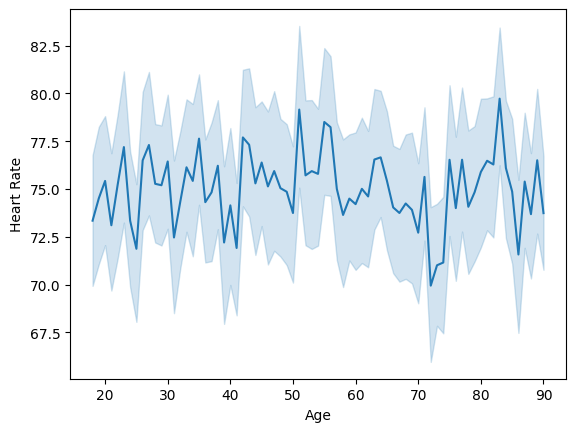

In [117]:
sns.lineplot (x="Age",y="Heart Rate",data=data)        # data parameter is used to pass the data 
plt.show()

Line chart by BP_diastolic and Heart Attack Risk

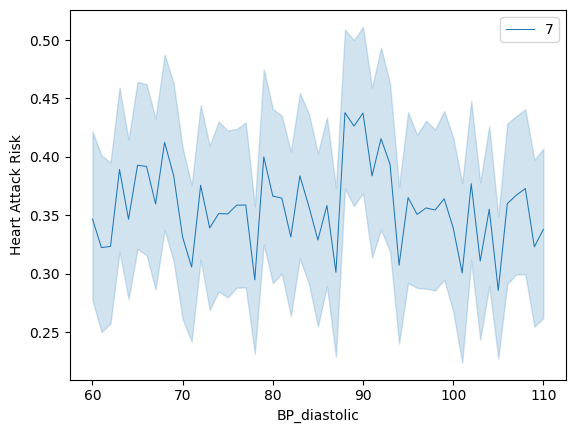

In [118]:
sns.lineplot (x="BP_diastolic",y="Heart Attack Risk",data=data,size = 7)  
plt.show() 

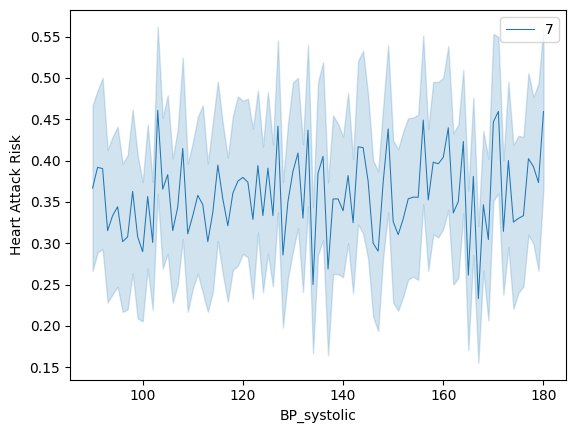

In [119]:
sns.lineplot (x="BP_systolic",y="Heart Attack Risk",data=data,size = 7)  
plt.show() 

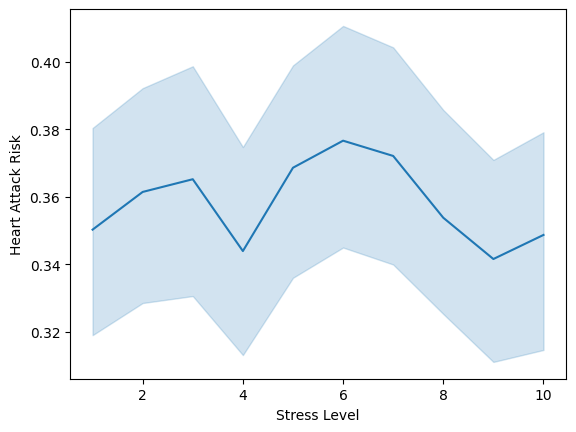

In [120]:
sns.lineplot (x="Stress Level",y="Heart Attack Risk",data=data)  
plt.show() 

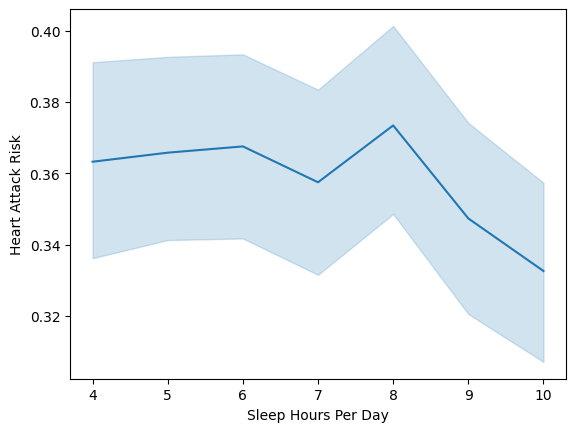

In [121]:
sns.lineplot (x="Sleep Hours Per Day",y="Heart Attack Risk",data=data) 
plt.show() 

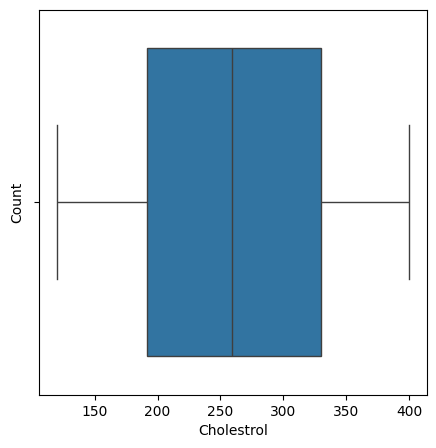

In [122]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, x='Cholesterol')
plt.xlabel('Cholestrol')
plt.ylabel('Count')
plt.show()

LabelEncoding

In [123]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

df2=data.select_dtypes('object')
dict1={}
for column in df2:
    dict1[column]=label
    df2[column]=dict1[column].fit_transform(data[column])
df2.head() 

,Sex,Diet,Hemisphere
0,1,0,1
1,1,2,0
2,0,1,0
3,1,0,0
4,1,2,0


In [126]:
data.drop(['Sex','Diet','Hemisphere'],axis=1,inplace=True)

In [127]:
data.head(2)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_systolic,BP_diastolic
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,31.251233,286,0,6,0,158,88
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,27.194973,235,1,7,0,165,93


In [128]:
data2=pd.concat([df2,data],axis=1)

In [129]:
data2.head()

,Sex,Diet,Hemisphere,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_systolic,BP_diastolic
0,1,0,1,67,208,72,0,0,1,0,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,1,2,0,21,389,98,1,1,1,1,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,0,1,0,21,324,72,1,0,0,0,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,1,0,0,84,383,73,1,1,1,0,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,1,2,0,66,318,93,1,1,1,1,...,0,6,1.514821,21.809144,231,1,5,0,91,88


In [130]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sex                              8763 non-null   int32  
 1   Diet                             8763 non-null   int32  
 2   Hemisphere                       8763 non-null   int32  
 3   Age                              8763 non-null   int64  
 4   Cholesterol                      8763 non-null   int64  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Previous Heart Probl

Handling inbalanced datassets:

In [131]:
data2['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [134]:
x=data2.drop('Heart Attack Risk',axis=1)
x.shape

(8763, 22)

In [135]:
y=data2['Heart Attack Risk']
y.shape

(8763,)

Oversampling technique
Smote(synthetic minority over_samplling technique):generate synthetic samples for the minority class